## Load in 17329 WT RBD:ACE2 data and get a feel for it

The data here corresponds to 278 trajectories (all trajs > 400 ns).

In [1]:
import pyemma
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load feature array
with open("042021_distances_0.5.pickle", "rb") as f:
    distances = pickle.load(f)

In [10]:
distances[0][1] # N501 - Y41 is index 5

array([[229, 164],
       [229, 165],
       [229, 166],
       [229, 167],
       [229, 168],
       [229, 169],
       [229, 170],
       [229, 107],
       [229, 171],
       [229, 173],
       [229, 174],
       [229, 175],
       [229, 540],
       [229, 541],
       [229, 542],
       [229, 543],
       [164, 165],
       [164, 166],
       [164, 167],
       [164, 168],
       [164, 169],
       [164, 170],
       [164, 107],
       [164, 171],
       [164, 173],
       [164, 174],
       [164, 175],
       [164, 540],
       [164, 541],
       [164, 542],
       [164, 543],
       [165, 166],
       [165, 167],
       [165, 168],
       [165, 169],
       [165, 170],
       [165, 107],
       [165, 171],
       [165, 173],
       [165, 174],
       [165, 175],
       [165, 540],
       [165, 541],
       [165, 542],
       [165, 543],
       [166, 167],
       [166, 168],
       [166, 169],
       [166, 170],
       [166, 107],
       [166, 171],
       [166, 173],
       [166,

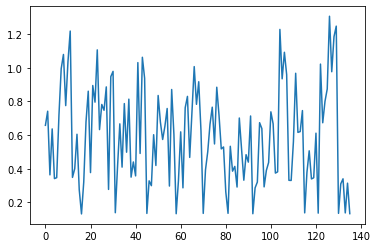

In [16]:
# Check what the timeseries of N501-Y41 distances looks like for first clone
plt.plot(distances[0][0][5])
plt.show()

## Now, let's run tica

In [41]:
# The input for tica needs to be a list of lists with the following dimensions:
# (number of trajs, number of frames, number of residue pairs)'

distances_final = np.array([output[0] for output in distances])

for_tica = []
for traj in distances_final:
    traj_distances = []
    for frame in traj:
        frame_distances = []
        for distance in frame:
            frame_distances.append(distance)
        traj_distances.append(frame_distances)
    for_tica.append(traj_distances)


<ipython-input-41-d56774620d51>:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  distances_final = np.array([output[0] for output in distances])


In [42]:
tica = pyemma.coordinates.tica(for_tica, lag=1) 

# The lag time (units: number of frames) doesn't matter, make it as short as possible 
# Will need to play around with:
# Kinetic map -- multiplies output coordinate by sqrt(eigenvalue), eigenvalues depend on lag time, so need to find sweet spot where this works best
# Commute map -- removes dependence on lag time by using timescales (multiplies output coordinate by timescales -- slowest thing gets multiplied by fastest timescale, fastest gets multiplied by the slowest timescale)
# dim -- how many tics you get out, -1 means you get out as many tics as numbers of features that capture var_cutoff variance 
# var_cutoff -- % cutoff variance for which to select number of tics

calculate covariances:   0%|          | 0/278 [00:00<?, ?it/s]

In [43]:
tica

TICA(commute_map=False, dim=-1, epsilon=1e-06, kinetic_map=True, lag=1,
   ncov_max=inf, reversible=True, skip=0, stride=1, var_cutoff=0.95,
   weights=None)

In [44]:
tica_output = tica.get_output()

getting output of TICA:   0%|          | 0/278 [00:00<?, ?it/s]

In [45]:
# Let's look at the tica output for the first traj
tica_output[0].shape 
# only 28 tics used because these capture 95% of variance (tics do not directly correspond to features)
# 411 corresponds to number of frames in the first traj

(411, 28)

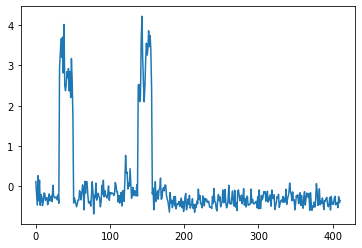

In [48]:
# Plot first tic for each frame for first trajectory
plt.plot(tica_output[0][:,0]) 
# This shows that there is some slowness in this tic -- most of the time its at 0

In [49]:
# Now, let's look at the correlation matrix between tics and residue-pairs
tica.feature_TIC_correlation

array([[-2.25218767e-01, -2.35443383e-01, -2.98306245e-02, ...,
        -1.38553066e-02, -4.70095357e-03, -9.23334999e-03],
       [ 3.71732484e-01, -3.62358856e-02,  1.50514009e-02, ...,
        -2.36882559e-03, -3.03727768e-02, -1.43678031e-02],
       [ 5.48017745e-02, -9.03076601e-02,  7.39199440e-02, ...,
         1.74613435e-02,  5.83374650e-03, -1.37511734e-02],
       ...,
       [-2.32886540e-03,  1.25688619e-02, -5.46105311e-04, ...,
        -2.72968648e-04,  3.34601007e-03,  7.27717445e-04],
       [ 2.54678460e-02, -1.26264359e-01, -5.95915932e-02, ...,
        -7.05364935e-03, -5.57259394e-03,  2.22562295e-02],
       [ 1.76791429e-03, -7.69626456e-03, -1.15132884e-03, ...,
         1.25579118e-03,  1.93774823e-03,  2.43401206e-03]])

In [51]:
tica.feature_TIC_correlation.shape # 136 distances, 28 tics

(136, 28)

In [52]:
# Check the correlations between each residue-pair and the first tic
tica.feature_TIC_correlation[:,0]

array([-2.25218767e-01,  3.71732484e-01,  5.48017745e-02,  3.18195955e-01,
        2.77866485e-01,  2.91189120e-01,  2.43276918e-01,  3.06742056e-01,
        2.40236839e-01,  2.60753025e-01,  2.83559941e-01,  2.77000254e-01,
        1.58762046e-01,  2.86823714e-01,  2.63311780e-01,  2.69707429e-01,
        2.65281959e-02, -1.64890474e-01, -2.88761405e-01, -3.20398344e-01,
       -1.99489798e-02,  1.58663296e-01,  1.43324629e-02,  2.32506600e-01,
        2.70227537e-01,  2.77865116e-01,  2.45312881e-01, -1.81612724e-01,
        3.26080665e-01, -5.16040040e-03, -2.01223971e-01, -2.48244527e-02,
        1.35387175e-01,  1.47444752e-01,  5.28900141e-02,  6.18837347e-02,
        5.55045903e-02, -1.96454062e-02,  8.63007251e-02, -1.17427071e-03,
        4.49719532e-03, -2.86858849e-02,  3.91004741e-01, -5.94782631e-02,
        1.40046985e-01,  1.86226904e-02, -1.27871441e-01,  1.40593540e-01,
       -8.13158083e-02, -4.44532113e-02, -6.82905787e-02, -1.15100569e-01,
       -1.88411040e-02, -

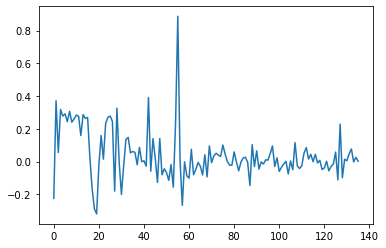

In [53]:
# Plot the correlation with tic 0 vs. residue-pair
plt.plot(tica.feature_TIC_correlation[:,0]) 
# Note the points in the plots should not be connected
# The 55th residue pairs is the slowest reaction coordinate

In [55]:
distances[0][1][55]

array([166, 541])

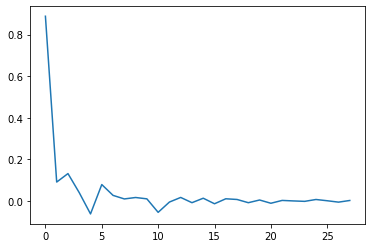

In [62]:
# Plot the correlation with residue-pair 55 vs. tic
plt.plot(tica.feature_TIC_correlation[55,:])

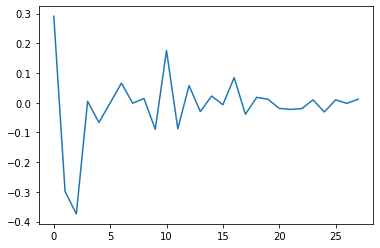

In [63]:
# Plot the correlation with residue-pair 5 vs. tic
plt.plot(tica.feature_TIC_correlation[5,:])
# residue pair 5 is somewhat correlated with tic 0, meaning it may contribute to a little to the slowest processes

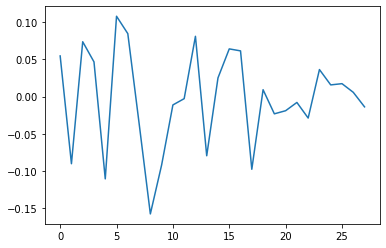

In [66]:
# Plot the correlation with residue-pair 2 vs. tic
plt.plot(tica.feature_TIC_correlation[2,:])
# residue pair 0 is not correlated with any of the tics, meaning it doesn't contribute much to the slowest processes

In [87]:
for_tica[0][0]

136

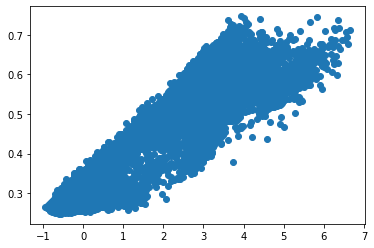

In [89]:
# For all frames, plot distance for residue pair 55 vs. the first tic
plt.scatter(np.concatenate([traj[:, 0] for traj in tica_output]), [frame[55] for traj in for_tica for frame in traj]) 
# These are correlated -- which matches what we observed above by using the correlation coefficient matrix
# to plot correlation with tic 0 vs. residue-pair

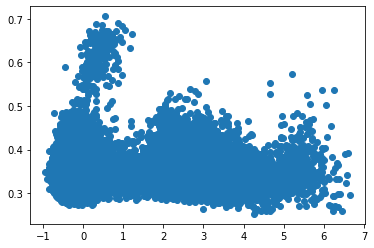

In [90]:
# For all frames, plot distance for residue pair 2 vs. the first tic
plt.scatter(np.concatenate([traj[:, 0] for traj in tica_output]), [frame[2] for traj in for_tica for frame in traj])
# Little to no correlation -- which matches what we observed above by using the correlation coefficient matrix
# to plot correlation with tic 0 vs. residue-pair

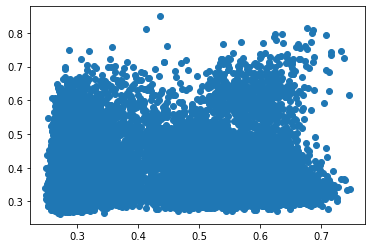

In [91]:
# Plot distance for the 55th residue pair vs. distance for the 5th residue-pair
plt.scatter([frame[55] for traj in for_tica for frame in traj], [frame[5] for traj in for_tica for frame in traj])


(array([7.9523e+04, 3.1002e+04, 8.7300e+02, 1.3940e+03, 4.4500e+03,
        2.6930e+03, 8.3100e+02, 4.5300e+02, 2.6300e+02, 4.8000e+01]),
 array([-0.9409308 , -0.18199858,  0.5769336 ,  1.3358659 ,  2.094798  ,
         2.8537302 ,  3.6126623 ,  4.3715944 ,  5.130527  ,  5.889459  ,
         6.6483912 ], dtype=float32),
 <BarContainer object of 10 artists>)

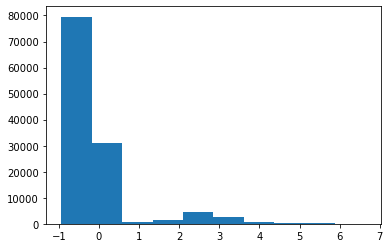

In [92]:
# Plot distribution of first tic for all the data
plt.hist(np.concatenate([traj[:, 0] for traj in tica_output]))

(array([107., 140.,  27.,   0.,   0.,   0.,   0.,   1.,   0.,   3.]),
 array([-0.60289484, -0.24921036,  0.10447411,  0.45815858,  0.8118431 ,
         1.1655276 ,  1.519212  ,  1.8728966 ,  2.226581  ,  2.5802655 ,
         2.93395   ], dtype=float32),
 <BarContainer object of 10 artists>)

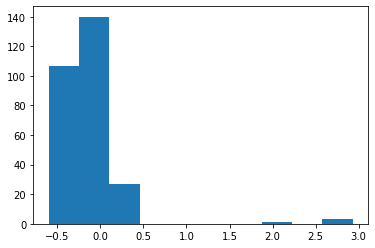

In [93]:
# Plot distribution of first tic for first frames for all data
plt.hist([traj[0, 0] for traj in tica_output]) 
# Distribution does not looks the same for first frame vs all frames, meaning this system is has not equilibrated 

In [ ]:
# TO DO:
# Look at 10 frames with low tics and 10 frames with high tics
# Look at trajectory with largest tic value
# Can also grab every 10 or so frames from smallest tica value to largest, and make a synthetic trajectory, then smooth it in pymol

In [61]:
# Get list of max tic values for each trajectory
maxes = []
for traj in tica_output:
    maxes.append(np.max(traj[:, 0]))

In [62]:
# Get the trajectory with the largest tic value
np.argmax(maxes)

216

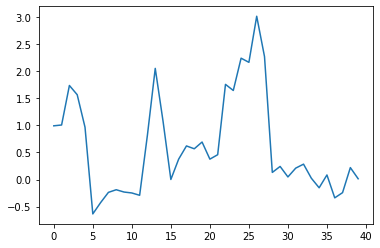

In [63]:
# Plot timeseries of the first tic for trajectory 216
plt.plot(tica_output[216][:,0]) 

## Now, let's cluster the tics

In [73]:
clusters = pyemma.coordinates.cluster_kmeans(tica_output, k=50, max_iter=100)
# k -- choose 50 or 100 to start depending on how big the dataset is
# max_iter = use 10 or 100 depending on dataset size

100%|██████████| 50/50 [00:00<00:00, 148.56it/s]                             

100%|██████████| 100/100 [00:01<00:00, 51.52it/s]


In [78]:
cluster_output = clusters.dtrajs

100%|██████████| 1000/1000 [00:04<00:00, 205.03it/s]                                   


In [79]:
cluster_output

[array([21, 35, 21, 21, 21, 28, 41, 28, 32, 21,  5, 28, 28, 21, 14, 21, 28,
        45, 21,  5, 28, 13, 21, 21, 21, 28, 28, 28, 28, 44, 28, 21, 28, 21,
        37, 25], dtype=int32),
 array([16,  7, 13, 11, 40, 11, 20, 41, 35, 37, 37,  1, 44, 28, 27, 13, 45,
        41, 28,  9,  9,  9, 28, 44, 39, 45, 41, 42, 41, 41,  5, 41, 31, 44,
        11, 16, 36, 16, 16, 16, 16, 16, 16, 16, 16, 16, 36, 36],
       dtype=int32),
 array([ 4, 25,  8,  8, 25, 12, 37,  8, 25,  4, 44, 21, 28, 37, 28, 32, 45,
        21, 21, 21,  0, 21], dtype=int32),
 array([ 8,  8, 12,  4,  4, 26, 37, 32, 32, 40, 13, 44, 35, 27, 41, 28,  0,
         9, 44, 18], dtype=int32),
 array([32, 21, 28, 21,  5, 21, 24,  9, 15,  0,  0, 28,  7, 13, 21, 41,  0,
        45,  7,  7, 45, 23,  7,  5, 37, 44,  0,  0, 32, 34,  0,  0, 34,  0,
        37, 24,  0,  9, 15, 32, 39,  5, 41,  9], dtype=int32),
 array([21, 21, 41,  5, 45, 41, 41, 42,  2, 29,  2, 45, 41, 41, 41, 41, 41,
        41, 41, 41, 41, 45, 41, 10, 41, 41, 41, 45, 41, 41

In [80]:
# Compute implied timescales -- computes multiple msms at diff lag times
its = pyemma.msm.its(cluster_output) 

100%|██████████| 7/7 [00:01<00:00,  3.99it/s]                                 


<AxesSubplot:xlabel='lag time / steps', ylabel='timescale / steps'>

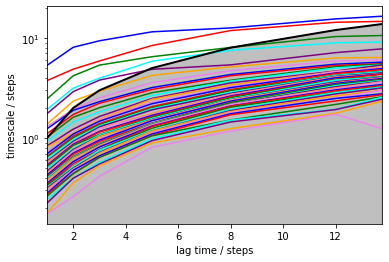

In [81]:
pyemma.plots.plot_implied_timescales(its) 
# Each line corresponds to a slow process (number processes = number of clusters - 1, so 49)
# Gray area -- lag time has become longer than the timescale of the process
# If we want to make an msm based on this data, we need to use lag time < 12 because its hitting gray region there
# perhaps these distances are not good descriptors of the slowest process because these distances describe a pretty fast timescale


## Build MSM

In [82]:
msm = pyemma.msm.estimate_markov_model(cluster_output, 7) 
# Alternatives to `estimate_markov_model`: hidden - coarse grained, augumented - with experimental data
# Choose 7 as lag time because it looks flat after lag time 7

In [84]:
msm.active_state_fraction 
# This you how many states we've kept (here, we've kept all state)
# Sometimes states are discarded if there are no transitions in both directions for that state

1.0

In [86]:
msm.eigenvectors_right 
# eigenvectors_left -- eigenvectors multiplied by the populations
# eigenvectors_right -- eigenvectors themselves

<bound method MSM.eigenvectors_right of MaximumLikelihoodMSM(connectivity='largest', core_set=None,
           count_mode='sliding', dt_traj='1 step', lag=7, maxerr=1e-08,
           maxiter=1000000, milestoning_method='last_core',
           mincount_connectivity='1/n', reversible=True, score_k=10,
           score_method='VAMP2', sparse=False, statdist_constraint=None)>

In [87]:
eigenvectors = msm.eigenvectors_right()

In [88]:
eigenvectors.shape # dimensions: states, value of eigenvector


(50, 50)

In [90]:
# Let's check that we have the dimensions right
eigenvectors[:, 0] # First eigenvector is equilibrium should be flat 

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

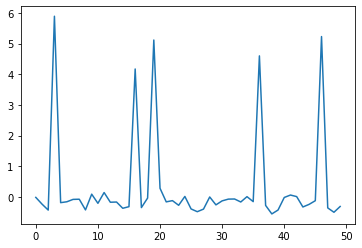

In [91]:
# Plot slowest eigenvector vs. states
plt.plot(eigenvectors[:,1]) # slowest eigenvector
# There's 5 microstates that form one macrostate, all the rest are another macrostate --> 2 macrostates

In [ ]:
# TODO:
# Can look at which state has the lowest vs highest -- in pymol
# What is the difference in distributions in the 5 states with spikes